<a href="https://colab.research.google.com/github/purnasrisaichellinkula/myproject/blob/main/final_project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries

#import pandasql as psql

# Loading Weather Dataset

In [ ]:
weather  = pd.read_csv(r"C:\Users\Dlc\Desktop\datasets\weatherAUS.csv", header=0)

weather_bk = weather.copy()

weather.sample(10)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
59950,2009-08-03,Sale,7.6,13.7,5.2,6.0,7.4,W,100.0,W,W,24.0,33.0,79.0,52.0,1020.3,1020.2,6.0,3.0,9.1,13.1,Yes,0.6,No
127694,2011-05-18,Hobart,9.6,14.8,0.0,0.8,0.2,NNW,37.0,WNW,NNW,7.0,15.0,71.0,53.0,1027.5,1024.9,NaN,NaN,11.5,14.7,No,0.0,No
108474,2016-01-18,Albany,18.8,21.0,15.0,6.2,0.0,NaN,NaN,SE,NaN,9.0,NaN,97.0,NaN,1008.9,1006.7,8.0,NaN,19.1,NaN,Yes,24.2,Yes
42640,2012-07-30,Wollongong,8.7,14.6,0.0,NaN,NaN,S,59.0,SW,S,20.0,35.0,49.0,50.0,1024.5,1022.5,NaN,NaN,11.4,14.3,No,0.0,No
8811,2017-03-02,Cobar,21.2,36.2,0.0,NaN,NaN,ESE,35.0,E,SSE,17.0,13.0,52.0,18.0,1015.8,1012.6,NaN,2.0,25.6,34.3,No,0.0,No
82746,2011-06-28,Brisbane,12.0,22.4,0.0,2.2,8.8,E,30.0,SSW,SE,6.0,11.0,62.0,58.0,1029.3,1026.8,1.0,3.0,16.6,20.3,No,0.0,No
25021,2013-04-04,Penrith,15.2,20.3,2.8,NaN,NaN,SSW,26.0,SSW,SSW,9.0,6.0,99.0,99.0,NaN,NaN,NaN,NaN,15.8,16.9,Yes,13.6,Yes
80841,2015-02-22,Dartmoor,17.9,39.9,0.0,10.4,7.2,WNW,46.0,WSW,WNW,2.0,26.0,84.0,20.0,1012.2,1008.4,NaN,NaN,21.2,38.9,No,1.6,Yes
19297,2013-10-12,NorahHead,14.8,25.4,0.0,NaN,NaN,NE,44.0,S,NE,2.0,28.0,75.0,74.0,1016.1,1009.5,NaN,NaN,18.5,23.3,No,0.0,No
140115,2015-12-04,Katherine,25.5,37.0,0.0,5.8,NaN,E,48.0,WNW,NW,9.0,11.0,64.0,NaN,1011.9,1007.0,4.0,NaN,32.0,NaN,No,13.4,Yes


# Checking Dataset Information

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

# DATA PREPROCESSING

# checking Duplicate Values in the Dataset

In [ ]:
print(weather.duplicated().any())

False


# Checking Any Missing Values In the Dataset

In [ ]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

# Representing The Missing Values in Graphical Format

<AxesSubplot:>

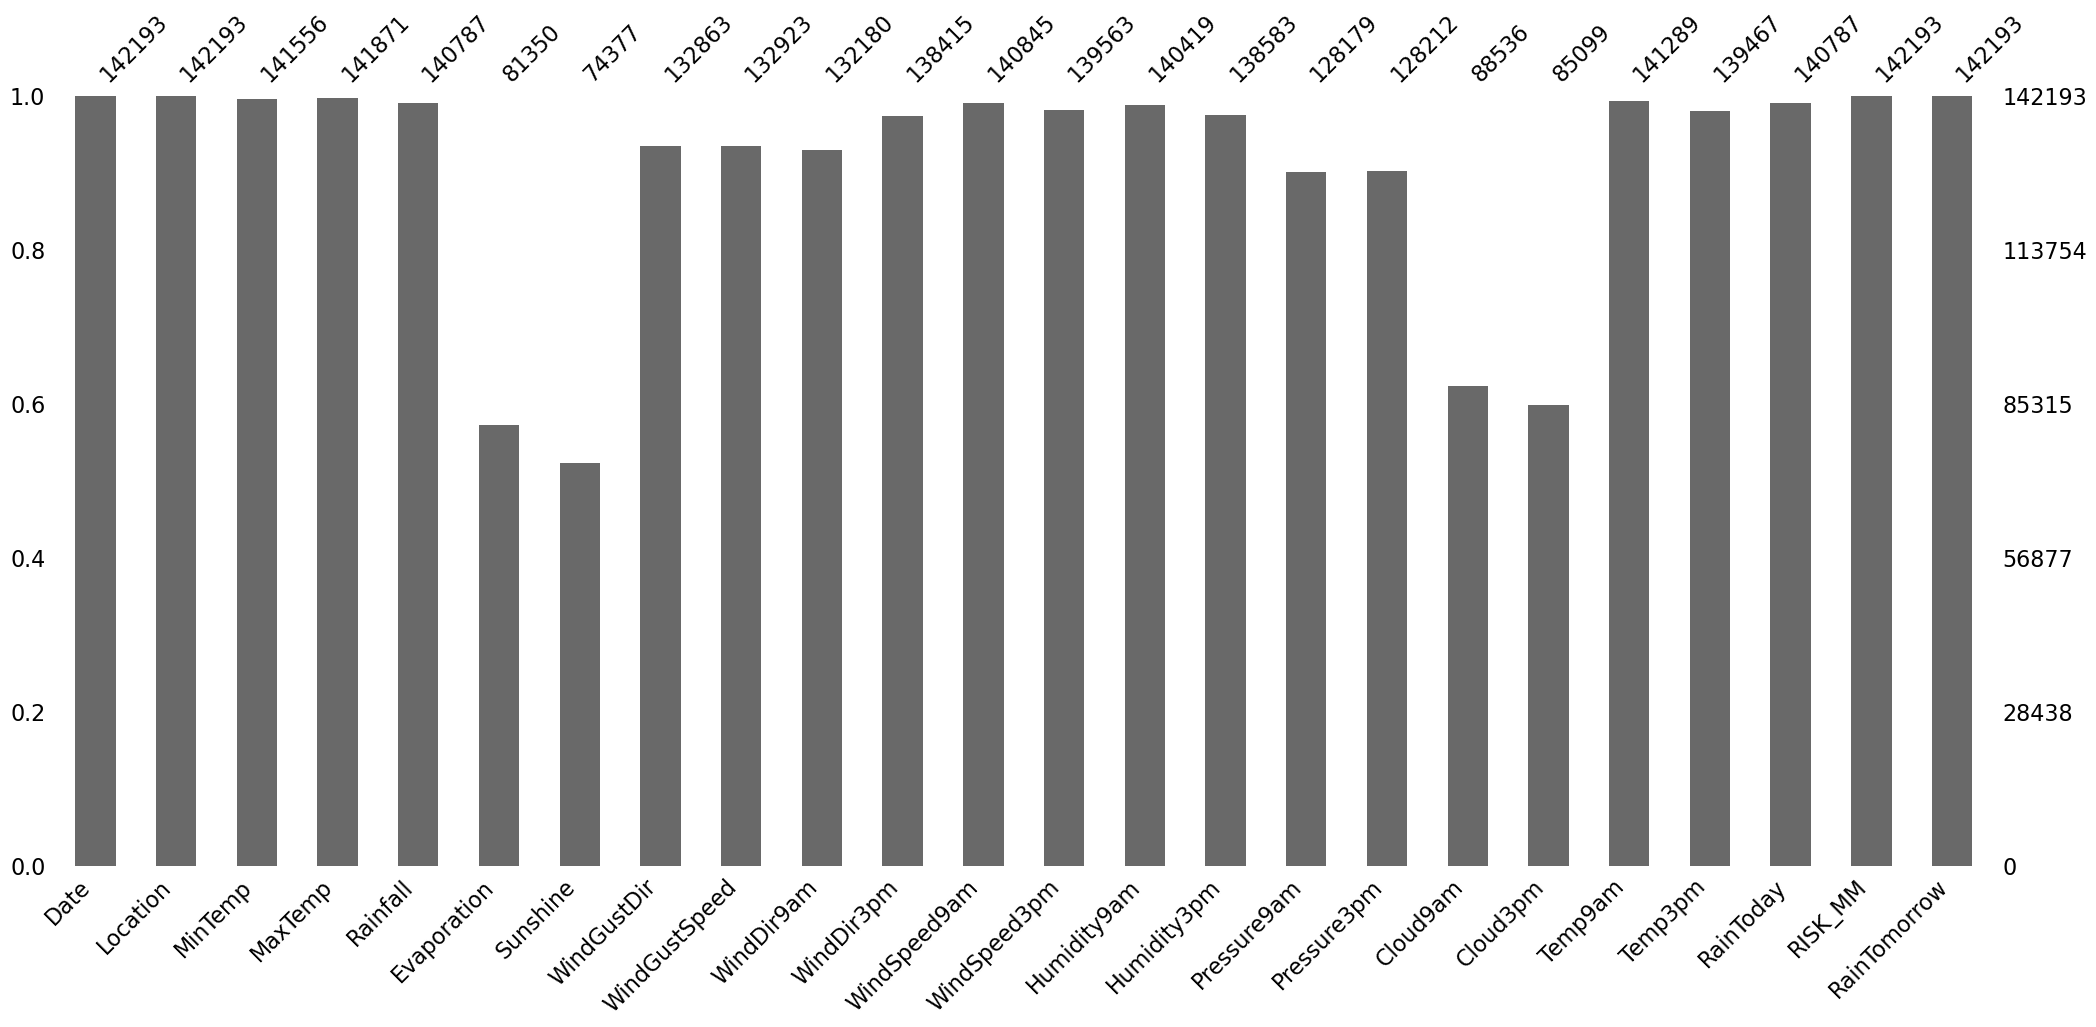

In [ ]:
import missingno as msno

msno.bar(weather)

# Filling The Missing Values Using KNNImputer(Numerical Values)

In [ ]:
# using KNN Imputer to ddress the Driver_Age missing values

# KNNImputer(missing_values=np.nan,n_neighbors=5,weights='uniform',metric='nama_euclidean',copy=True,add_indicator=False)

from sklearn.impute import KNNImputer

# create an object for KNNImputer

imputer_knn = KNNImputer(missing_values=np.nan)

#fill the missing values for 'MinTemp'

weather['MinTemp'] = imputer_knn.fit_transform(weather[['MinTemp']])

weather['MinTemp'] = weather['MinTemp'].astype(int)

In [ ]:
#fill the missing values for 'MaxTemp'

weather['MaxTemp'] = imputer_knn.fit_transform(weather[['MaxTemp']])

weather['MaxTemp'] = weather['MaxTemp'].astype(int)


In [ ]:
#fill the missing values for 'Rainfall'

weather['Rainfall'] = imputer_knn.fit_transform(weather[['Rainfall']])

weather['Rainfall'] = weather['Rainfall'].astype(int)

In [ ]:
#fill the missing values for 'Evaporation'

weather['Evaporation'] = imputer_knn.fit_transform(weather[['Evaporation']])

weather['Evaporation'] = weather['Evaporation'].astype(int)


In [ ]:
#fill the missing values for 'Sunshine'

weather['Sunshine'] = imputer_knn.fit_transform(weather[['Sunshine']])

weather['Sunshine'] = weather['Sunshine'].astype(int)


In [ ]:
#fill the missing values for 'WindGustSpeed'

weather['WindGustSpeed'] = imputer_knn.fit_transform(weather[['WindGustSpeed']])

weather['WindGustSpeed'] = weather['WindGustSpeed'].astype(int)


In [ ]:
#fill the missing values for 'WindSpeed9am'

weather['WindSpeed9am'] = imputer_knn.fit_transform(weather[['WindSpeed9am']])

weather['WindSpeed9am'] = weather['WindSpeed9am'].astype(int)

In [ ]:
#fill the missing values for 'WindSpeed3pm'

weather['WindSpeed3pm'] = imputer_knn.fit_transform(weather[['WindSpeed3pm']])

weather['WindSpeed3pm'] = weather['WindSpeed3pm'].astype(int)


In [ ]:
#fill the missing values for 'Humidity9am'

weather['Humidity9am'] = imputer_knn.fit_transform(weather[['Humidity9am']])

weather['Humidity9am'] = weather['Humidity9am'].astype(int)


In [ ]:
#fill the missing values for 'Humidity3pm'

weather['Humidity3pm'] = imputer_knn.fit_transform(weather[['Humidity3pm']])

weather['Humidity3pm'] = weather['Humidity3pm'].astype(int)


In [ ]:
#fill the missing values for 'Pressure9am'

weather['Pressure9am'] = imputer_knn.fit_transform(weather[['Pressure9am']])

weather['Pressure9am'] = weather['Pressure9am'].astype(int)


In [ ]:
#fill the missing values for 'Pressure3pm'

weather['Pressure3pm'] = imputer_knn.fit_transform(weather[['Pressure3pm']])

weather['Pressure3pm'] = weather['Pressure3pm'].astype(int)


In [ ]:
#fill the missing values for 'Cloud9am'

weather['Cloud9am'] = imputer_knn.fit_transform(weather[['Cloud9am']])

weather['Cloud9am'] = weather['Cloud9am'].astype(int)


In [ ]:
#fill the missing values for 'Cloud3pm'

weather['Cloud3pm'] = imputer_knn.fit_transform(weather[['Cloud3pm']])

weather['Cloud3pm'] = weather['Cloud3pm'].astype(int)


In [ ]:
#fill the missing values for 'Temp9am'

weather['Temp9am'] = imputer_knn.fit_transform(weather[['Temp9am']])

weather['Temp9am'] = weather['Temp9am'].astype(int)


In [ ]:
#fill the missing values for 'Temp3pm'

weather['Temp3pm'] = imputer_knn.fit_transform(weather[['Temp3pm']])

weather['Temp3pm'] = weather['Temp3pm'].astype(int)


In [ ]:
#fill the missing values for 'Temp3pm'

weather['Temp3pm'] = imputer_knn.fit_transform(weather[['Temp3pm']])

weather['Temp3pm'] = weather['Temp3pm'].astype(int)

# Filling The Missing Values Using simpleImputer(Catagorical Values )

In [ ]:
# simpleImputer Techinue

from sklearn.impute import SimpleImputer

#simpleImputer(missing_values=nan,strategy='mean',fill_value=None,verbose='deprecated',copy=True,add_indicator=False,keep_empty_features=False)

#create an object for simpleImputer

imputer_si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

weather['WindGustDir']=imputer_si.fit_transform(weather[['WindGustDir']])
weather['WindDir9am']=imputer_si.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm']=imputer_si.fit_transform(weather[['WindDir3pm']])
weather['RainToday']=imputer_si.fit_transform(weather[['RainToday']])



weather


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13,22,0,5,7,W,44,W,WNW,20,24,71,22,1007,1007,8,4,16,21,No,0.0,No
1,2008-12-02,Albury,7,25,0,5,7,WNW,44,NNW,WSW,4,22,44,25,1010,1007,4,4,17,24,No,0.0,No
2,2008-12-03,Albury,12,25,0,5,7,WSW,46,W,WSW,19,26,38,30,1007,1008,4,2,21,23,No,0.0,No
3,2008-12-04,Albury,9,28,0,5,7,NE,24,SE,E,11,9,45,16,1017,1012,4,4,18,26,No,1.0,No
4,2008-12-05,Albury,17,32,1,5,7,W,41,ENE,NW,7,20,82,33,1010,1006,7,8,17,29,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3,21,0,5,7,E,31,ESE,E,15,13,59,27,1024,1021,4,4,9,20,No,0.0,No
142189,2017-06-21,Uluru,2,23,0,5,7,E,31,SE,ENE,13,11,51,24,1024,1020,4,4,10,22,No,0.0,No
142190,2017-06-22,Uluru,3,25,0,5,7,NNW,22,SE,N,13,9,56,21,1023,1019,4,4,10,24,No,0.0,No
142191,2017-06-23,Uluru,5,26,0,5,7,N,37,SE,WNW,9,9,53,24,1021,1016,4,4,12,26,No,0.0,No


# Graph After Filling Missing Values

<AxesSubplot:>

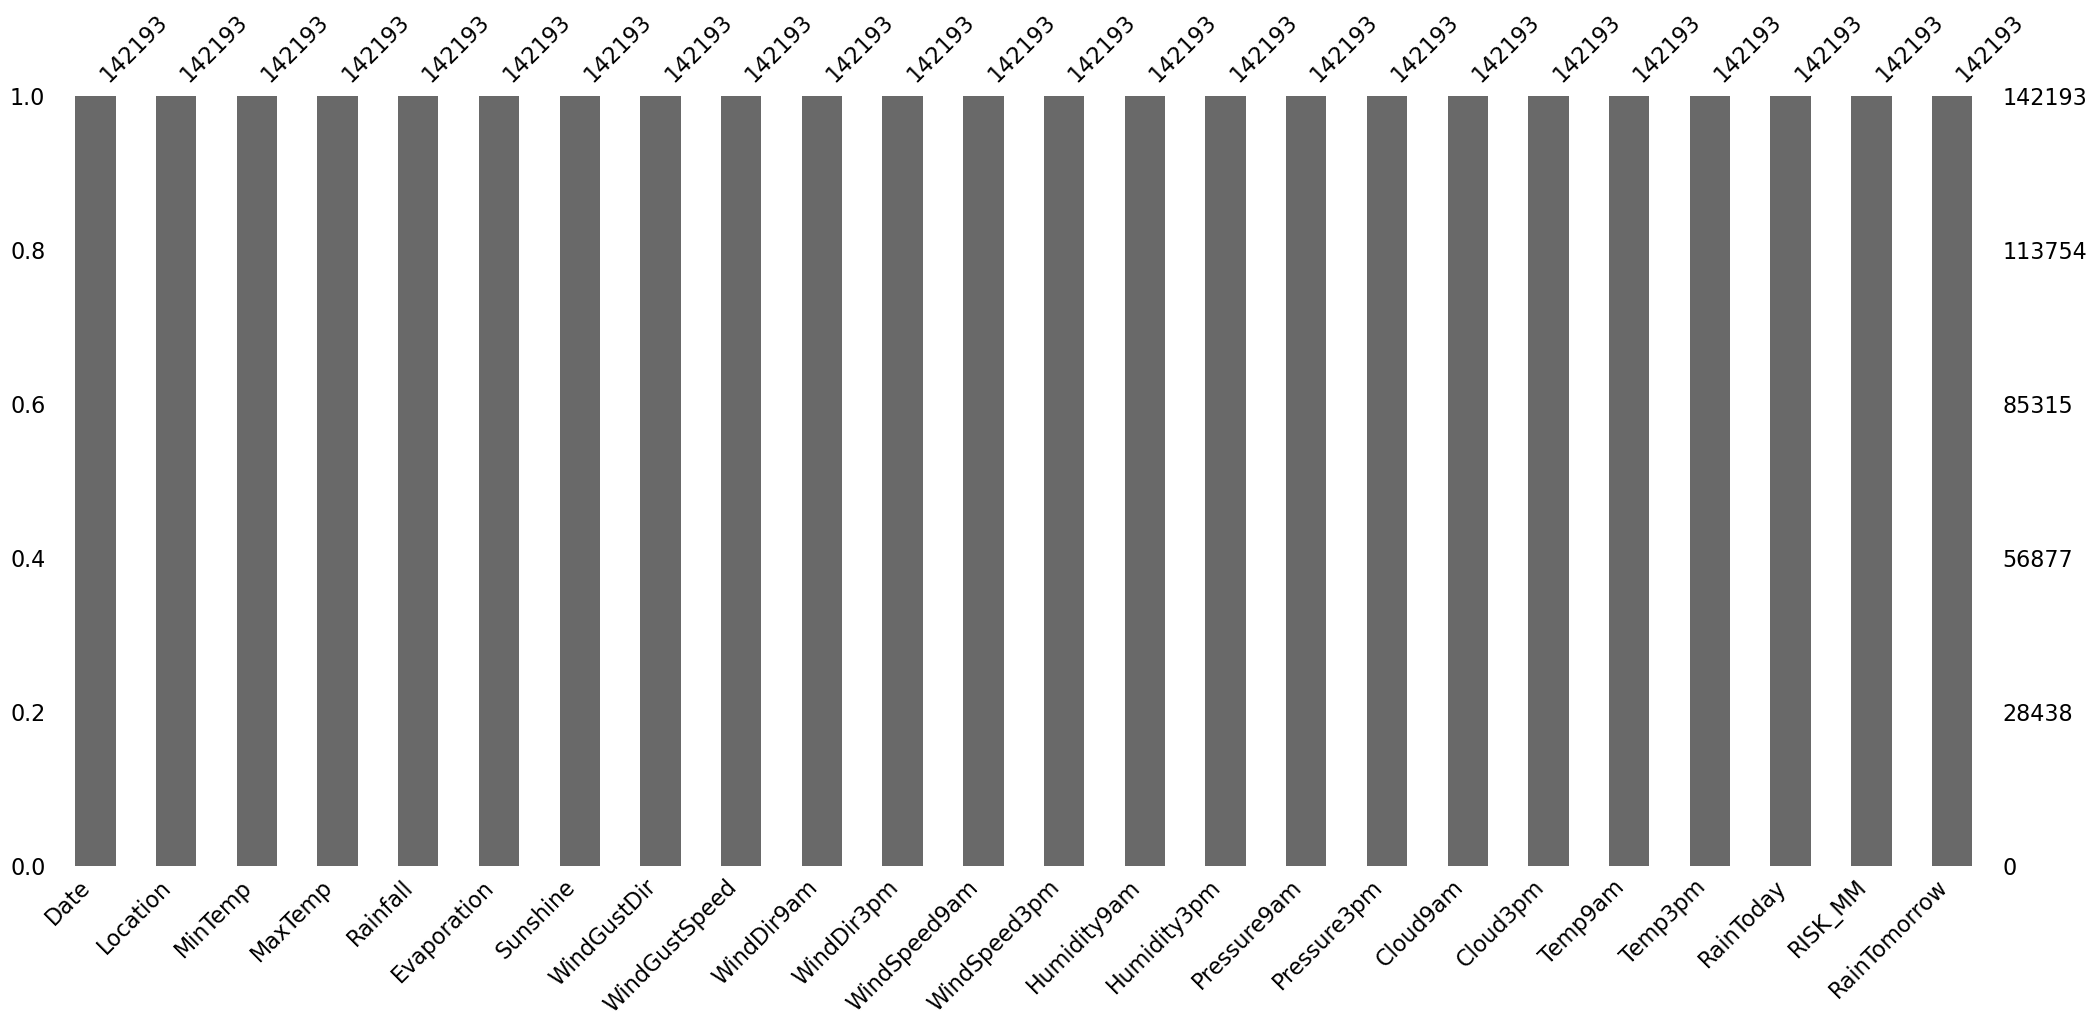

In [ ]:
import missingno as msno

msno.bar(weather)

# Identifying Unique Values For Each Variable in The Dataset

In [ ]:
weather.nunique()

Date             3436
Location           49
MinTemp            41
MaxTemp            53
Rainfall          179
Evaporation        73
Sunshine           15
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       44
WindSpeed3pm       45
Humidity9am       101
Humidity3pm       101
Pressure9am        61
Pressure3pm        63
Cloud9am           10
Cloud3pm           10
Temp9am            48
Temp3pm            52
RainToday           2
RISK_MM           681
RainTomorrow        2
dtype: int64

# Counting Unique Values for Catagorical Variables inorder to label Encoding Process

In [ ]:
weather['Location'].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [ ]:
weather['WindGustDir'].value_counts()

W      19110
SE      9309
E       9071
N       9033
SSE     8993
S       8949
WSW     8901
SW      8797
SSW     8610
WNW     8066
NW      8003
ENE     7992
ESE     7305
NE      7060
NNW     6561
NNE     6433
Name: WindGustDir, dtype: int64

In [ ]:
weather['WindDir9am'].value_counts()

N      21406
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [ ]:
weather['WindDir3pm'].value_counts()

SE     14441
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

# LabelEncoding

In [ ]:
# use Label encoder for Catagorical  variables

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

weather['RainTomorrow'] = LE.fit_transform(weather['RainTomorrow'])

weather['RainToday'] = LE.fit_transform(weather['RainToday'])

weather['Location'] = LE.fit_transform(weather['Location'])

weather['WindGustDir'] = LE.fit_transform(weather['WindGustDir'])

weather['WindDir9am'] = LE.fit_transform(weather['WindDir9am'])

weather['WindDir3pm'] = LE.fit_transform(weather['WindDir3pm'])

In [ ]:
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,2,13,22,0,5,7,13,44,13,14,20,24,71,22,1007,1007,8,4,16,21,0,0.0,0
1,2008-12-02,2,7,25,0,5,7,14,44,6,15,4,22,44,25,1010,1007,4,4,17,24,0,0.0,0
2,2008-12-03,2,12,25,0,5,7,15,46,13,15,19,26,38,30,1007,1008,4,2,21,23,0,0.0,0
3,2008-12-04,2,9,28,0,5,7,4,24,9,0,11,9,45,16,1017,1012,4,4,18,26,0,1.0,0
4,2008-12-05,2,17,32,1,5,7,13,41,1,7,7,20,82,33,1010,1006,7,8,17,29,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,41,3,21,0,5,7,0,31,2,0,15,13,59,27,1024,1021,4,4,9,20,0,0.0,0
142189,2017-06-21,41,2,23,0,5,7,0,31,9,1,13,11,51,24,1024,1020,4,4,10,22,0,0.0,0
142190,2017-06-22,41,3,25,0,5,7,6,22,9,3,13,9,56,21,1023,1019,4,4,10,24,0,0.0,0
142191,2017-06-23,41,5,26,0,5,7,3,37,9,14,9,9,53,24,1021,1016,4,4,12,26,0,0.0,0


# Deleting unwanted Variables which does not impact on Target Variable

In [ ]:
del weather['Date']
del weather['RISK_MM']

# Identifying  The  Proportion of Target Variable in Dataset

In [ ]:
# Count the target or dependent variable by '0' & '1' and their proportion
# (>= 10 : 1, then the dataset is imbalance data)

RainTomorrow_count = weather.RainTomorrow.value_counts()
print('Class 0:', RainTomorrow_count[0])
print('Class 1:', RainTomorrow_count[1])
print('Proportion:', round(RainTomorrow_count[0] / RainTomorrow_count[1], 2), ': 1')
print('Total  weatherAus  records:', len(weather))

Class 0: 110316
Class 1: 31877
Proportion: 3.46 : 1
Total  weatherAus  records: 142193


# Identify the independent and target (dependent) variables

In [ ]:
# Identify the independent and targrt (dependent) variables

IndepVar = []
for col in weather.columns:
    if col != 'RainTomorrow':
        IndepVar.append(col)
TargetVar ='RainTomorrow'

x = weather[IndepVar]
y = weather[TargetVar]

# Split the data into train and test (random sampling)

In [ ]:
 # Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((99535, 21), (42658, 21), (99535,), (42658,))

# Scaling the features by using MinMaxScaler

In [ ]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Compare Algorithms

In [ ]:
# Load the results dataset for KNN

KNN_Results  = pd.read_csv(r"C:\Users\Dlc\Desktop\datasets\KNN_Results.csv", header=0)



KNN_Results.head()


,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 4925  4600]
 [ 4286 28847]]
Outcome values : 
 4925 4600 4286 28847
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.52      0.53      9525
           0       0.86      0.87      0.87     33133

    accuracy                           0.79     42658
   macro avg       0.70      0.69      0.70     42658
weighted avg       0.79      0.79      0.79     42658

Accuracy : 79.2 %
Precision : 53.5 %
Recall : 51.7 %
F1 Score : 0.526
Specificity or True Negative Rate : 87.1 %
Balanced Accuracy : 69.4 %
MCC : 0.392
roc_auc_score: 0.694


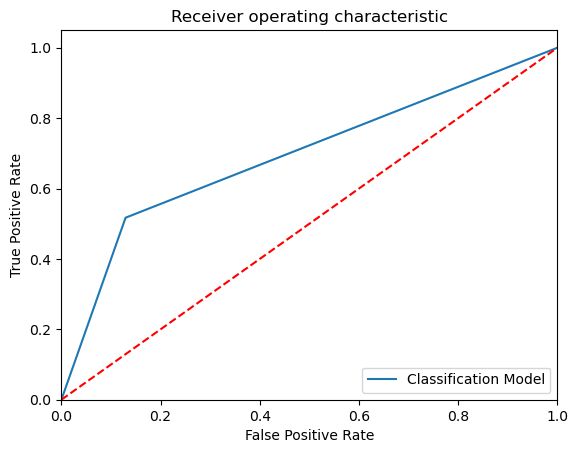

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 3139  6386]
 [ 1392 31741]]
Outcome values : 
 3139 6386 1392 31741
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.33      0.45      9525
           0       0.83      0.96      0.89     33133

    accuracy                           0.82     42658
   macro avg       0.76      0.64      0.67     42658
weighted avg       0.80      0.82      0.79     42658

Accuracy : 81.8 %
Precision : 69.3 %
Recall : 33.0 %
F1 Score : 0.447
Specificity or True Negative Rate : 95.8 %
Balanced Accuracy : 64.4 %
MCC : 0.389
roc_auc_score: 0.644


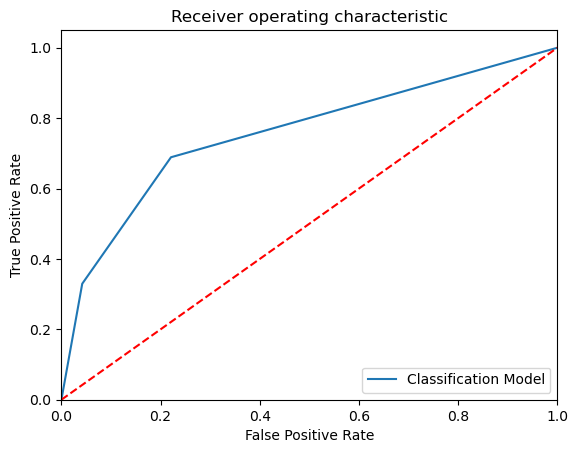

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 4775  4750]
 [ 2924 30209]]
Outcome values : 
 4775 4750 2924 30209
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.50      0.55      9525
           0       0.86      0.91      0.89     33133

    accuracy                           0.82     42658
   macro avg       0.74      0.71      0.72     42658
weighted avg       0.81      0.82      0.81     42658

Accuracy : 82.0 %
Precision : 62.0 %
Recall : 50.1 %
F1 Score : 0.554
Specificity or True Negative Rate : 91.2 %
Balanced Accuracy : 70.6 %
MCC : 0.447
roc_auc_score: 0.707


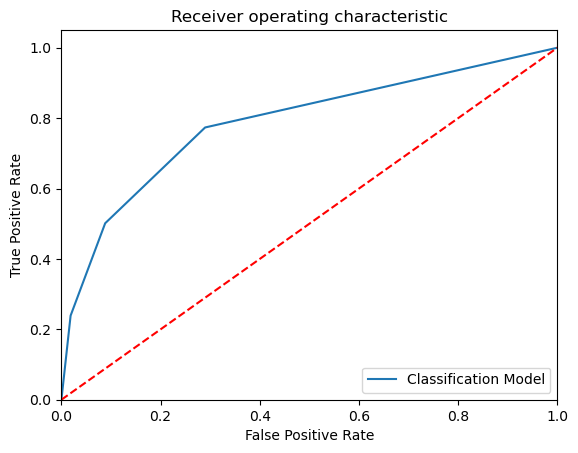

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 3640  5885]
 [ 1463 31670]]
Outcome values : 
 3640 5885 1463 31670
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.38      0.50      9525
           0       0.84      0.96      0.90     33133

    accuracy                           0.83     42658
   macro avg       0.78      0.67      0.70     42658
weighted avg       0.81      0.83      0.81     42658

Accuracy : 82.8 %
Precision : 71.3 %
Recall : 38.2 %
F1 Score : 0.498
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 66.9 %
MCC : 0.434
roc_auc_score: 0.669


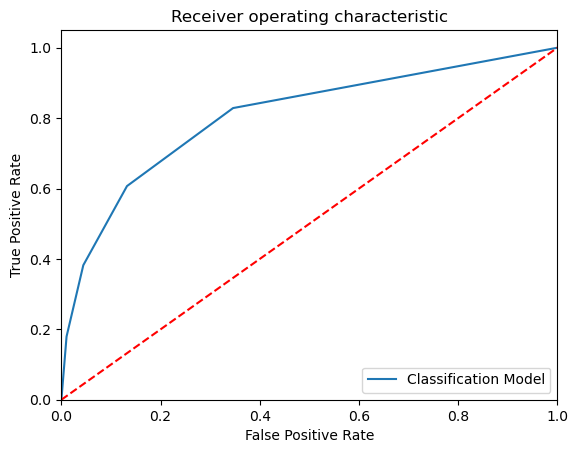

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 4685  4840]
 [ 2384 30749]]
Outcome values : 
 4685 4840 2384 30749
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.49      0.56      9525
           0       0.86      0.93      0.89     33133

    accuracy                           0.83     42658
   macro avg       0.76      0.71      0.73     42658
weighted avg       0.82      0.83      0.82     42658

Accuracy : 83.1 %
Precision : 66.3 %
Recall : 49.2 %
F1 Score : 0.565
Specificity or True Negative Rate : 92.8 %
Balanced Accuracy : 71.0 %
MCC : 0.47
roc_auc_score: 0.71


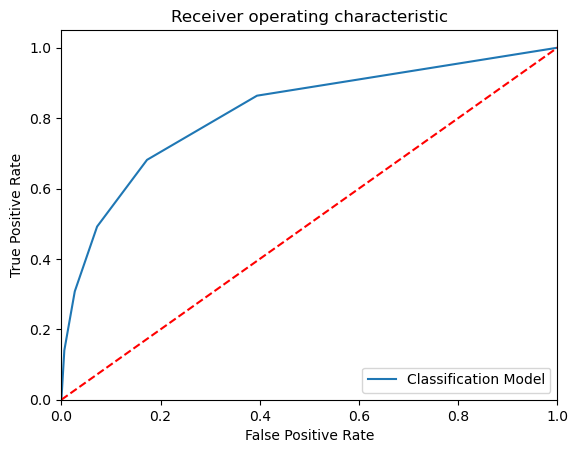

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 3892  5633]
 [ 1508 31625]]
Outcome values : 
 3892 5633 1508 31625
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.41      0.52      9525
           0       0.85      0.95      0.90     33133

    accuracy                           0.83     42658
   macro avg       0.78      0.68      0.71     42658
weighted avg       0.82      0.83      0.81     42658

Accuracy : 83.3 %
Precision : 72.1 %
Recall : 40.9 %
F1 Score : 0.522
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 68.2 %
MCC : 0.455
roc_auc_score: 0.682


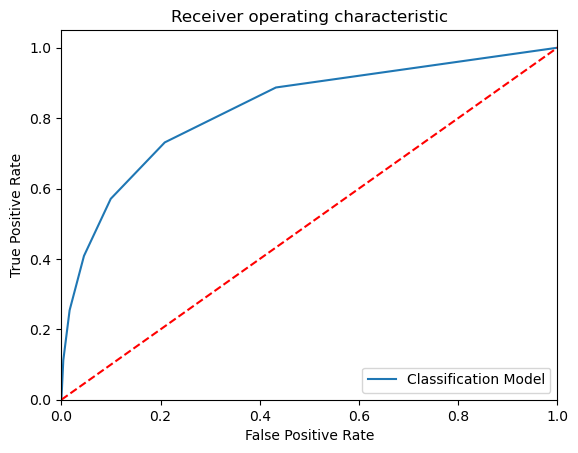

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 4631  4894]
 [ 2179 30954]]
Outcome values : 
 4631 4894 2179 30954
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.49      0.57      9525
           0       0.86      0.93      0.90     33133

    accuracy                           0.83     42658
   macro avg       0.77      0.71      0.73     42658
weighted avg       0.82      0.83      0.82     42658

Accuracy : 83.4 %
Precision : 68.0 %
Recall : 48.6 %
F1 Score : 0.567
Specificity or True Negative Rate : 93.4 %
Balanced Accuracy : 71.0 %
MCC : 0.478
roc_auc_score: 0.71


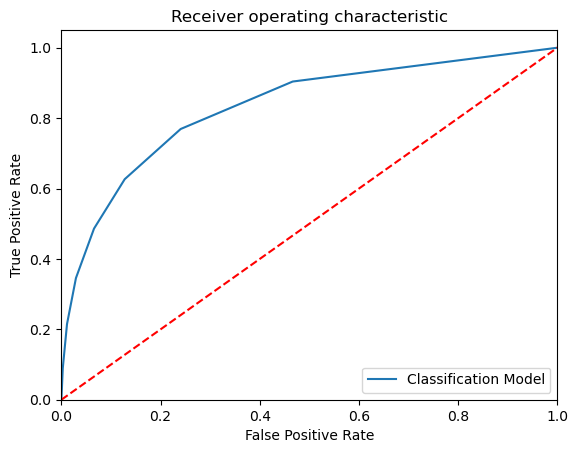

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 4030  5495]
 [ 1500 31633]]
Outcome values : 
 4030 5495 1500 31633
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.42      0.54      9525
           0       0.85      0.95      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.79      0.69      0.72     42658
weighted avg       0.82      0.84      0.82     42658

Accuracy : 83.6 %
Precision : 72.9 %
Recall : 42.3 %
F1 Score : 0.535
Specificity or True Negative Rate : 95.5 %
Balanced Accuracy : 68.9 %
MCC : 0.468
roc_auc_score: 0.689


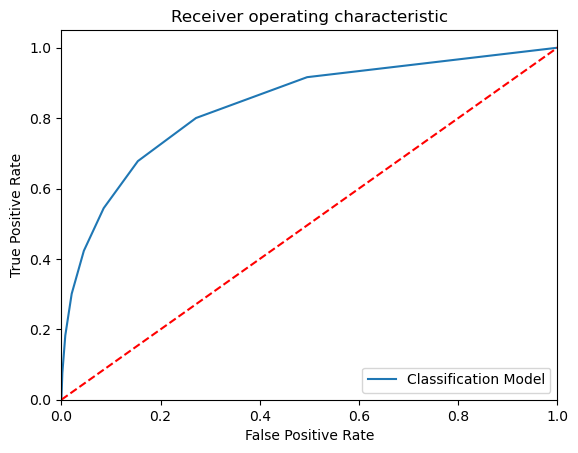

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 4579  4946]
 [ 2027 31106]]
Outcome values : 
 4579 4946 2027 31106
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.48      0.57      9525
           0       0.86      0.94      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.78      0.71      0.73     42658
weighted avg       0.82      0.84      0.83     42658

Accuracy : 83.7 %
Precision : 69.3 %
Recall : 48.1 %
F1 Score : 0.568
Specificity or True Negative Rate : 93.9 %
Balanced Accuracy : 71.0 %
MCC : 0.483
roc_auc_score: 0.71


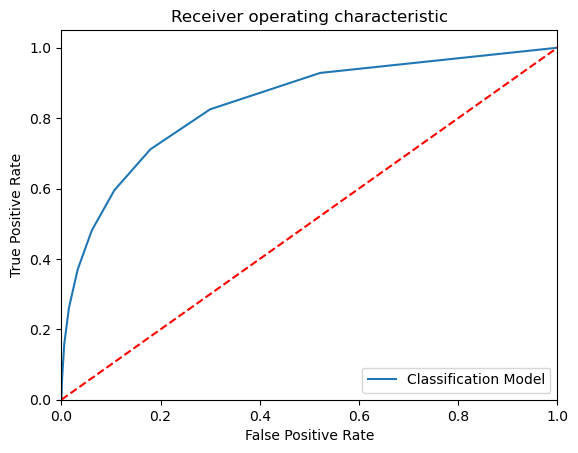

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 4030  5495]
 [ 1478 31655]]
Outcome values : 
 4030 5495 1478 31655
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.42      0.54      9525
           0       0.85      0.96      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.79      0.69      0.72     42658
weighted avg       0.83      0.84      0.82     42658

Accuracy : 83.7 %
Precision : 73.2 %
Recall : 42.3 %
F1 Score : 0.536
Specificity or True Negative Rate : 95.5 %
Balanced Accuracy : 68.9 %
MCC : 0.47
roc_auc_score: 0.689


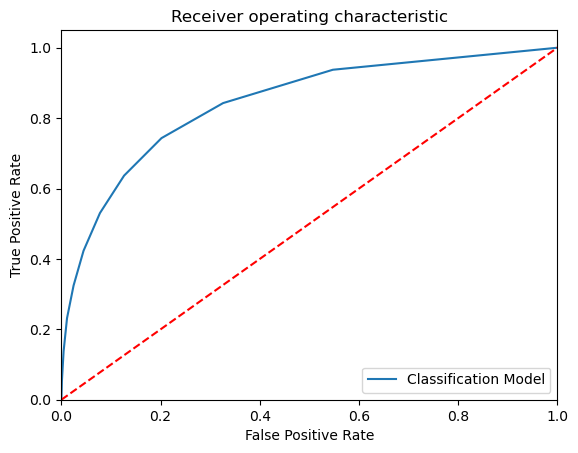

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 4509  5016]
 [ 1909 31224]]
Outcome values : 
 4509 5016 1909 31224
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.47      0.57      9525
           0       0.86      0.94      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.78      0.71      0.73     42658
weighted avg       0.83      0.84      0.83     42658

Accuracy : 83.8 %
Precision : 70.3 %
Recall : 47.3 %
F1 Score : 0.566
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 70.8 %
MCC : 0.484
roc_auc_score: 0.708


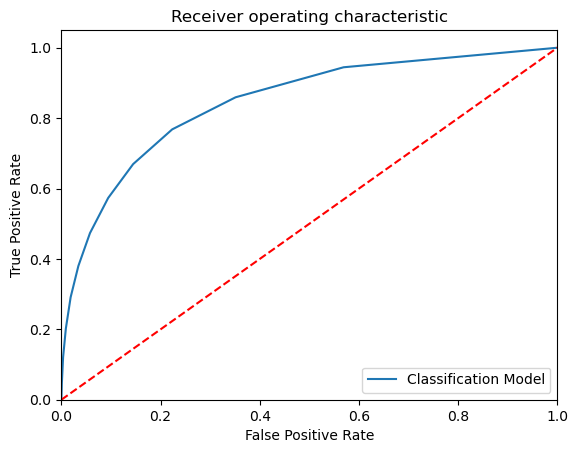

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 4084  5441]
 [ 1461 31672]]
Outcome values : 
 4084 5441 1461 31672
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.43      0.54      9525
           0       0.85      0.96      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.79      0.69      0.72     42658
weighted avg       0.83      0.84      0.82     42658

Accuracy : 83.8 %
Precision : 73.7 %
Recall : 42.9 %
F1 Score : 0.542
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 69.2 %
MCC : 0.476
roc_auc_score: 0.692


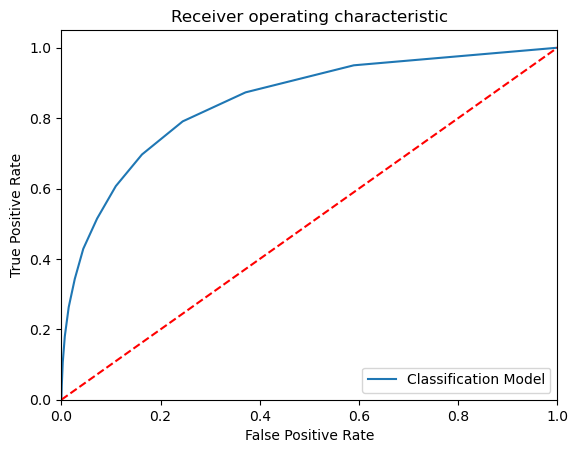

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 4480  5045]
 [ 1857 31276]]
Outcome values : 
 4480 5045 1857 31276
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.47      0.56      9525
           0       0.86      0.94      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.78      0.71      0.73     42658
weighted avg       0.83      0.84      0.83     42658

Accuracy : 83.8 %
Precision : 70.7 %
Recall : 47.0 %
F1 Score : 0.565
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 70.7 %
MCC : 0.485
roc_auc_score: 0.707


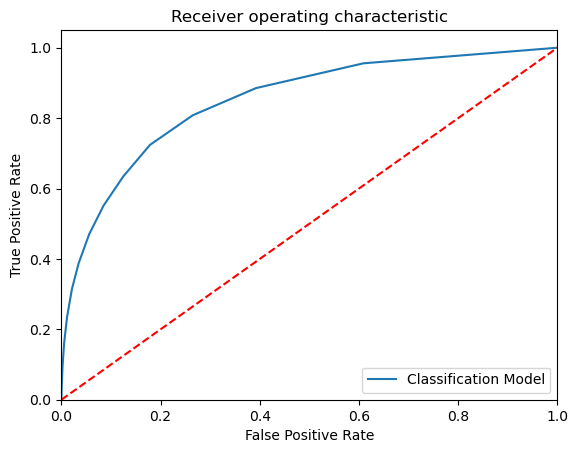

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 4070  5455]
 [ 1463 31670]]
Outcome values : 
 4070 5455 1463 31670
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.43      0.54      9525
           0       0.85      0.96      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.79      0.69      0.72     42658
weighted avg       0.83      0.84      0.82     42658

Accuracy : 83.8 %
Precision : 73.6 %
Recall : 42.7 %
F1 Score : 0.541
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 69.2 %
MCC : 0.475
roc_auc_score: 0.692


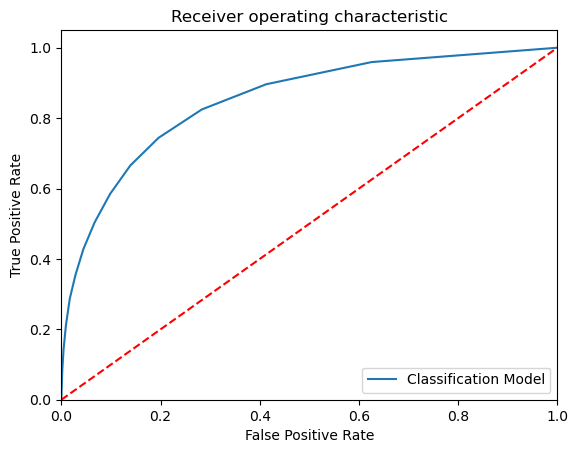

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 4375  5150]
 [ 1790 31343]]
Outcome values : 
 4375 5150 1790 31343
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.46      0.56      9525
           0       0.86      0.95      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.78      0.70      0.73     42658
weighted avg       0.83      0.84      0.82     42658

Accuracy : 83.7 %
Precision : 71.0 %
Recall : 45.9 %
F1 Score : 0.558
Specificity or True Negative Rate : 94.6 %
Balanced Accuracy : 70.2 %
MCC : 0.48
roc_auc_score: 0.703


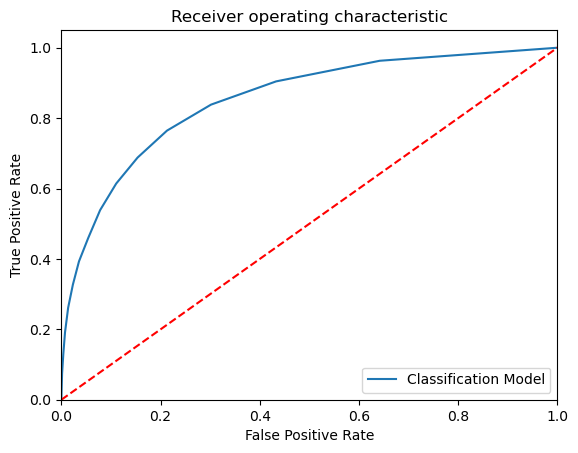

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 4048  5477]
 [ 1454 31679]]
Outcome values : 
 4048 5477 1454 31679
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.42      0.54      9525
           0       0.85      0.96      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.79      0.69      0.72     42658
weighted avg       0.83      0.84      0.82     42658

Accuracy : 83.8 %
Precision : 73.6 %
Recall : 42.5 %
F1 Score : 0.539
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 69.0 %
MCC : 0.474
roc_auc_score: 0.691


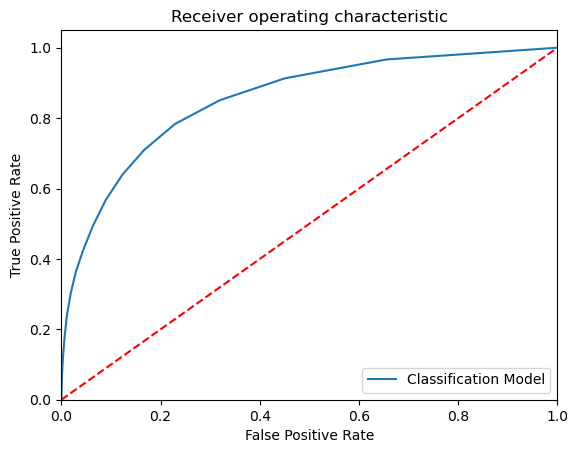

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 4355  5170]
 [ 1751 31382]]
Outcome values : 
 4355 5170 1751 31382
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.46      0.56      9525
           0       0.86      0.95      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.79      0.70      0.73     42658
weighted avg       0.83      0.84      0.82     42658

Accuracy : 83.8 %
Precision : 71.3 %
Recall : 45.7 %
F1 Score : 0.557
Specificity or True Negative Rate : 94.7 %
Balanced Accuracy : 70.2 %
MCC : 0.481
roc_auc_score: 0.702


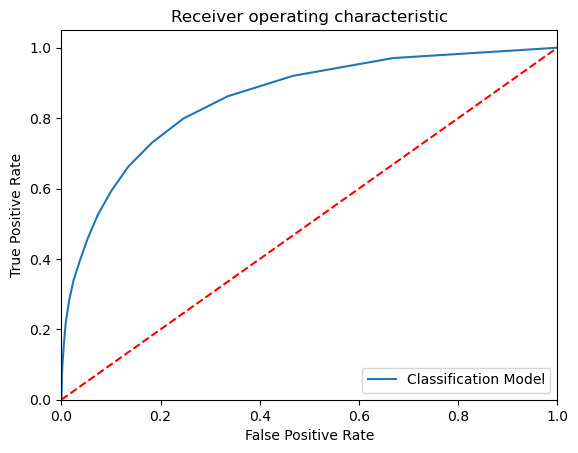

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 4042  5483]
 [ 1450 31683]]
Outcome values : 
 4042 5483 1450 31683
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.42      0.54      9525
           0       0.85      0.96      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.79      0.69      0.72     42658
weighted avg       0.83      0.84      0.82     42658

Accuracy : 83.7 %
Precision : 73.6 %
Recall : 42.4 %
F1 Score : 0.538
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 69.0 %
MCC : 0.473
roc_auc_score: 0.69


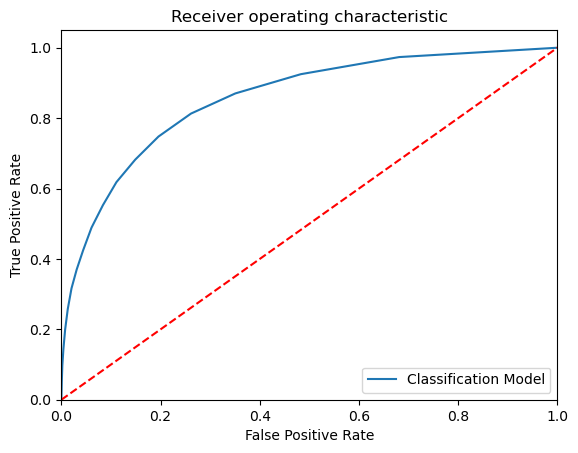

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 4345  5180]
 [ 1660 31473]]
Outcome values : 
 4345 5180 1660 31473
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.46      0.56      9525
           0       0.86      0.95      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.79      0.70      0.73     42658
weighted avg       0.83      0.84      0.83     42658

Accuracy : 84.0 %
Precision : 72.4 %
Recall : 45.6 %
F1 Score : 0.56
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 70.3 %
MCC : 0.486
roc_auc_score: 0.703


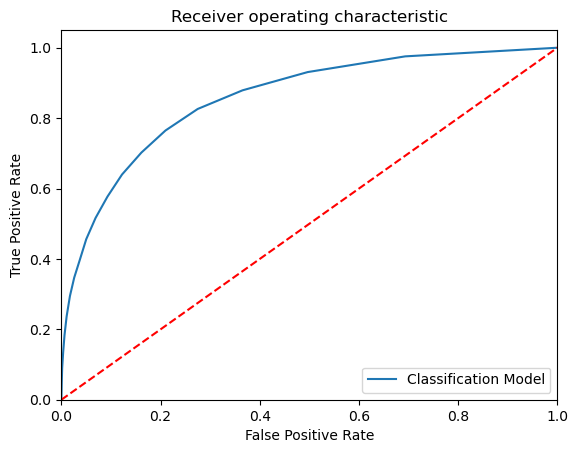

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 4065  5460]
 [ 1436 31697]]
Outcome values : 
 4065 5460 1436 31697
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.43      0.54      9525
           0       0.85      0.96      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.80      0.69      0.72     42658
weighted avg       0.83      0.84      0.82     42658

Accuracy : 83.8 %
Precision : 73.9 %
Recall : 42.7 %
F1 Score : 0.541
Specificity or True Negative Rate : 95.7 %
Balanced Accuracy : 69.2 %
MCC : 0.476
roc_auc_score: 0.692


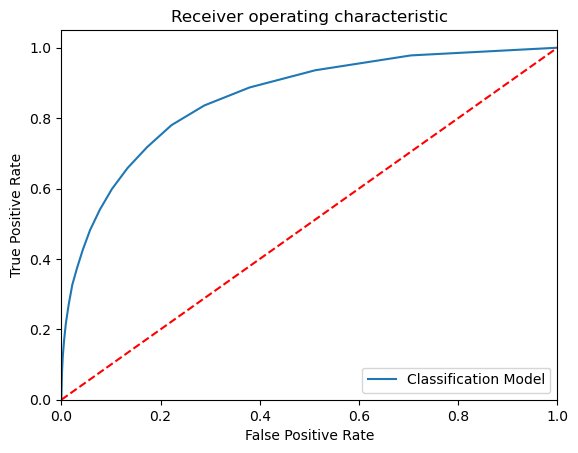

In [ ]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):

    k = a

    # Build the model

    ModelKNN = KNeighborsClassifier(n_neighbors=k)

    # Train the model

    ModelKNN.fit(x_train, y_train)

    # Predict the model

    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)

    print('KNN_K_value = ', a)

    # Print the model name

    print('Model Name: ', ModelKNN)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [ ]:
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,4925,4600,4286,28847,0.792,0.535,0.517,0.526,0.871,0.392,0.693851,0.694
1,KNeighborsClassifier(n_neighbors=2),2,3139,6386,1392,31741,0.818,0.693,0.330,0.447,0.958,0.389,0.643771,0.644
2,KNeighborsClassifier(n_neighbors=3),3,4775,4750,2924,30209,0.820,0.620,0.501,0.554,0.912,0.447,0.706531,0.706
3,KNeighborsClassifier(n_neighbors=4),4,3640,5885,1463,31670,0.828,0.713,0.382,0.498,0.956,0.434,0.668998,0.669
4,KNeighborsClassifier(),5,4685,4840,2384,30749,0.831,0.663,0.492,0.565,0.928,0.470,0.709956,0.710
5,KNeighborsClassifier(n_neighbors=6),6,3892,5633,1508,31625,0.833,0.721,0.409,0.522,0.954,0.455,0.681548,0.682
6,KNeighborsClassifier(n_neighbors=7),7,4631,4894,2179,30954,0.834,0.680,0.486,0.567,0.934,0.478,0.710214,0.710
7,KNeighborsClassifier(n_neighbors=8),8,4030,5495,1500,31633,0.836,0.729,0.423,0.535,0.955,0.468,0.688913,0.689
8,KNeighborsClassifier(n_neighbors=9),9,4579,4946,2027,31106,0.837,0.693,0.481,0.568,0.939,0.483,0.709779,0.710
9,KNeighborsClassifier(n_neighbors=10),10,4030,5495,1478,31655,0.837,0.732,0.423,0.536,0.955,0.470,0.689245,0.689


In [ ]:
# Load the results dataset for SVM

EMResults1  = pd.read_csv(r"C:\Users\Dlc\Desktop\datasets\EMResults.csv", header=0)



EMResults1.head()


,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM Algorithm

In [ ]:
#Comparing the all SVM Models
x_train_reduced = x_train.sample(10000)
y_train_reduced = y_train.sample(10000)
from sklearn.svm import SVC
ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True,
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

models=[ModelSVM1,ModelSVMPoly,ModelSVMSig,ModelSVMGaussian]
for i in models:
    i.fit(x_train_reduced, y_train_reduced)

    # Prediction

    y_pred = i.predict(x_test)
    y_pred_prob = i.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', i)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : i,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults1 = EMResults1.append(new_row, ignore_index=True)

Model Name:  SVC(kernel='linear', probability=True)
Confusion matrix : 
 [[    0  9525]
 [    0 33133]]
Outcome values : 
 0 9525 0 33133
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      9525
           0       0.78      1.00      0.87     33133

    accuracy                           0.78     42658
   macro avg       0.39      0.50      0.44     42658
weighted avg       0.60      0.78      0.68     42658

Accuracy : 77.7 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[    0  9525]
 [    0 33133]]
Outcome values : 
 0 9525 0 33133
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00

In [ ]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"SVC(kernel='linear', probability=True)",0,9525,0,33133,0.777,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,"SVC(degree=2, kernel='poly', probability=True)",0,9525,0,33133,0.777,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
2,"SVC(class_weight='balanced', kernel='sigmoid',...",5800,3725,16399,16734,0.528,0.261,0.609,0.366,0.505,0.095,0.556990,0.557
3,"SVC(class_weight='balanced', probability=True,...",5564,3961,18154,14979,0.482,0.235,0.584,0.335,0.452,0.030,0.518117,0.518


In [ ]:
# Load the results dataset for SVM

EMResults  = pd.read_csv(r"C:\Users\Dlc\Desktop\datasets\EMResults.csv", header=0)



EMResults.head()


,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Naive_bayes Algorithm

Confusion matrix : 
 [[ 5201  4324]
 [ 4173 28960]]
Outcome values : 
 5201 4324 4173 28960
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.55      0.55      9525
           0       0.87      0.87      0.87     33133

    accuracy                           0.80     42658
   macro avg       0.71      0.71      0.71     42658
weighted avg       0.80      0.80      0.80     42658

Accuracy : 80.1 %
Precision : 55.5 %
Recall : 54.6 %
F1 Score : 0.55
Specificity or True Negative Rate : 87.4 %
Balanced Accuracy : 71.0 %
MCC : 0.422
roc_auc_score: 0.71


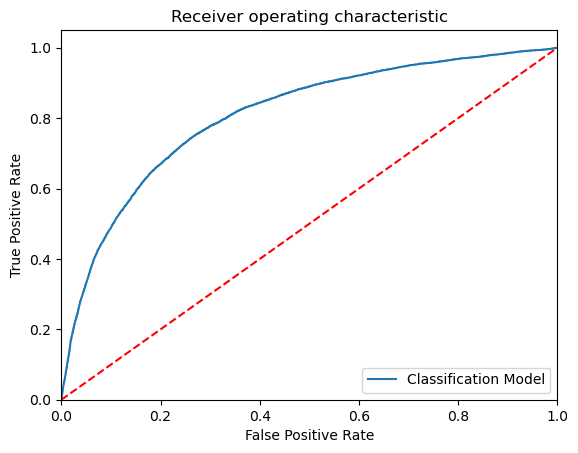

-----------------------------------------------------------------------------------------------------


In [ ]:


# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelGNB.predict(x_test)
y_pred_prob = modelGNB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelGNB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')

# comparing All Classification Algorithms

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 4681  4844]
 [ 1916 31217]]
Outcome values : 
 4681 4844 1916 31217
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.49      0.58      9525
           0       0.87      0.94      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.79      0.72      0.74     42658
weighted avg       0.83      0.84      0.83     42658

Accuracy : 84.2 %
Precision : 71.0 %
Recall : 49.1 %
F1 Score : 0.581
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 71.6 %
MCC : 0.499
roc_auc_score: 0.717


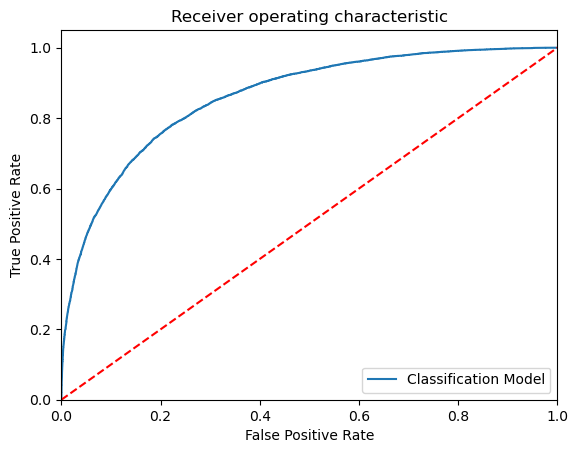

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 5116  4409]
 [ 5945 27188]]
Outcome values : 
 5116 4409 5945 27188
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.54      0.50      9525
           0       0.86      0.82      0.84     33133

    accuracy                           0.76     42658
   macro avg       0.66      0.68      0.67     42658
weighted avg       0.77      0.76      0.76     42658

Accuracy : 75.7 %
Precision : 46.3 %
Recall : 53.7 %
F1 Score : 0.497
Specificity or True Negative Rate : 82.1 %
Balanced Accuracy : 67.9 %
MCC : 0.34
roc_auc_score: 0.679


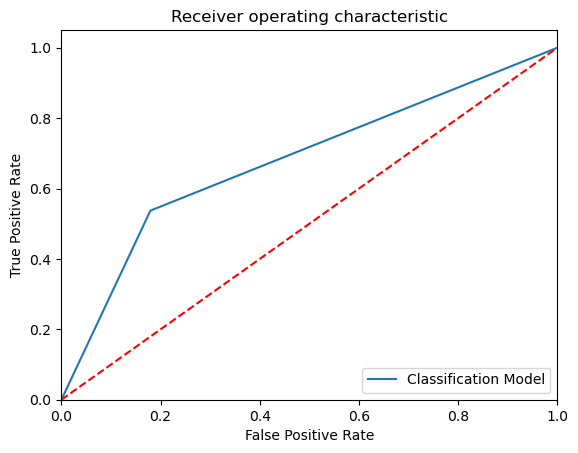

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 4850  4675]
 [ 1655 31478]]
Outcome values : 
 4850 4675 1655 31478
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.51      0.61      9525
           0       0.87      0.95      0.91     33133

    accuracy                           0.85     42658
   macro avg       0.81      0.73      0.76     42658
weighted avg       0.84      0.85      0.84     42658

Accuracy : 85.2 %
Precision : 74.6 %
Recall : 50.9 %
F1 Score : 0.605
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 73.0 %
MCC : 0.532
roc_auc_score: 0.73


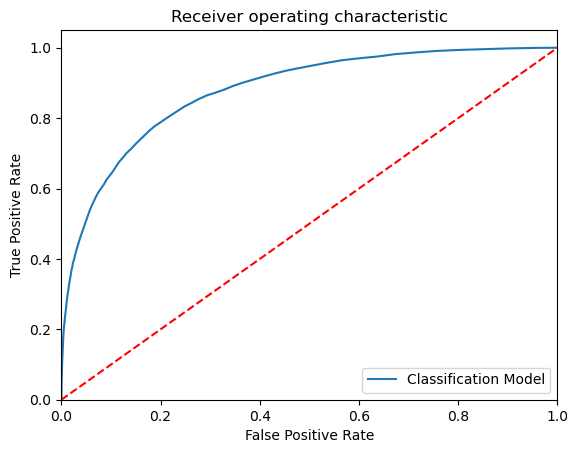

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 4677  4848]
 [ 1578 31555]]
Outcome values : 
 4677 4848 1578 31555
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.49      0.59      9525
           0       0.87      0.95      0.91     33133

    accuracy                           0.85     42658
   macro avg       0.81      0.72      0.75     42658
weighted avg       0.84      0.85      0.84     42658

Accuracy : 84.9 %
Precision : 74.8 %
Recall : 49.1 %
F1 Score : 0.593
Specificity or True Negative Rate : 95.2 %
Balanced Accuracy : 72.2 %
MCC : 0.522
roc_auc_score: 0.722


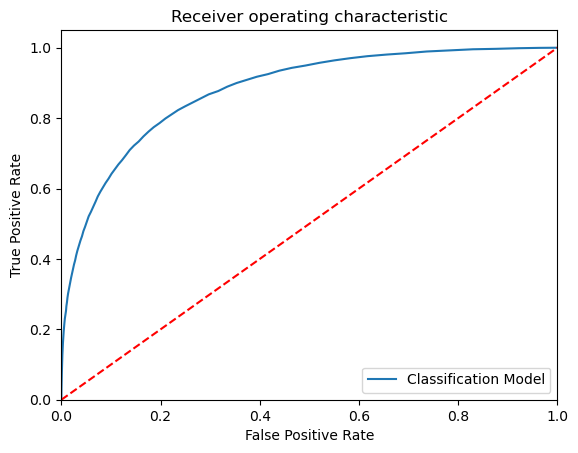

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 4042  5483]
 [ 1450 31683]]
Outcome values : 
 4042 5483 1450 31683
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.42      0.54      9525
           0       0.85      0.96      0.90     33133

    accuracy                           0.84     42658
   macro avg       0.79      0.69      0.72     42658
weighted avg       0.83      0.84      0.82     42658

Accuracy : 83.7 %
Precision : 73.6 %
Recall : 42.4 %
F1 Score : 0.538
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 69.0 %
MCC : 0.473
roc_auc_score: 0.69


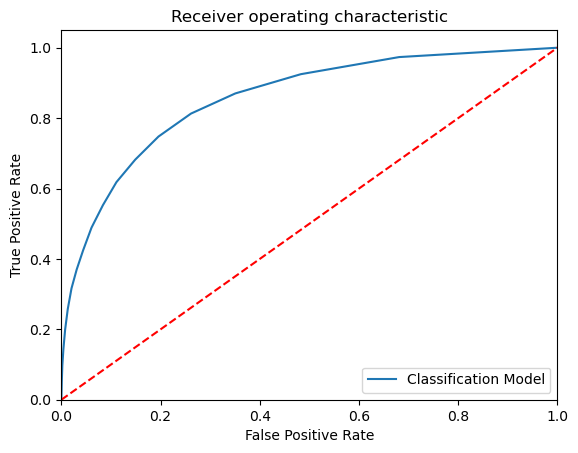

-----------------------------------------------------------------------------------------------------


In [ ]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=19)
#ModelSVM = SVC(kernel='linear', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN]

for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------


In [ ]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),4681,4844,1916,31217,0.842,0.710,0.491,0.581,0.942,0.499,0.716808,0.716
1,DecisionTreeClassifier(),5116,4409,5945,27188,0.757,0.463,0.537,0.497,0.821,0.340,0.678842,0.679
2,"(DecisionTreeClassifier(max_features='auto', r...",4850,4675,1655,31478,0.852,0.746,0.509,0.605,0.950,0.532,0.729618,0.730
3,"(ExtraTreeClassifier(random_state=554780901), ...",4677,4848,1578,31555,0.849,0.748,0.491,0.593,0.952,0.522,0.721699,0.722
4,KNeighborsClassifier(n_neighbors=18),4042,5483,1450,31683,0.837,0.736,0.424,0.538,0.956,0.473,0.690297,0.690


# Predict the values with Random Forest  Algorithm(High Accuracy)

In [ ]:
# Predict the values with RF Algorithm

y_pred = ModelRF.predict(x_test)

# Display the Final result

In [ ]:
#create new dataframe with actual vs prdict values

#Display the Final result

Results = pd.DataFrame({'RainTomorrow_A':y_test,'RainTomorrow_P':y_pred})

#Merge two Dataframes on index of both the dataframes

ResultsFinal = weather_bk.merge(Results,left_index=True,right_index=True)

# 'map' function to convert the numerical values to Catagorical format

ResultsFinal['RainTomorrow_A'] = ResultsFinal['RainTomorrow_A'].map({0:'No',1:'Yes'})
ResultsFinal['RainTomorrow_P'] = ResultsFinal['RainTomorrow_P'].map({0:'No',1:'Yes'})
# Same as str.replace command

# Display 10 records randomly

ResultsFinal.sample(10)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RainTomorrow_A,RainTomorrow_P
111577,2016-06-28,Witchcliffe,11.4,18.7,20.0,NaN,NaN,WNW,35.0,NNW,W,13.0,19.0,99.0,79.0,1009.9,1008.9,NaN,NaN,14.6,16.4,Yes,7.6,Yes,Yes,Yes
23353,2016-09-27,NorfolkIsland,16.1,20.3,4.0,2.8,NaN,WSW,46.0,SSE,SW,17.0,26.0,84.0,75.0,1007.3,1005.8,8.0,8.0,18.3,18.9,Yes,5.2,Yes,Yes,Yes
101293,2012-09-10,Nuriootpa,3.1,19.4,0.0,2.8,10.9,W,31.0,NaN,W,0.0,19.0,63.0,39.0,1024.4,1021.2,0.0,0.0,13.2,19.0,No,0.0,No,No,No
67453,2013-12-20,Melbourne,21.3,24.2,0.0,13.2,11.1,S,56.0,SW,S,13.0,31.0,61.0,68.0,1012.4,1014.2,2.0,6.0,23.0,21.5,No,0.0,No,No,No
64857,2015-01-20,MelbourneAirport,10.1,30.1,0.0,9.8,0.9,N,63.0,N,N,39.0,33.0,49.0,32.0,1007.7,1003.9,7.0,7.0,21.0,29.1,No,0.0,No,No,Yes
57555,2011-05-03,Bendigo,6.8,18.7,0.0,1.6,NaN,SSE,31.0,S,SSW,17.0,17.0,71.0,47.0,1018.4,1017.0,0.0,3.0,12.5,18.0,No,0.0,No,No,No
77187,2013-03-06,Watsonia,14.9,33.4,0.0,10.0,11.4,N,35.0,ENE,NNE,7.0,13.0,62.0,29.0,1017.3,1014.2,3.0,3.0,20.9,32.1,No,0.0,No,No,No
15509,2011-01-21,Newcastle,18.7,29.5,0.2,NaN,NaN,NaN,NaN,NE,SE,4.0,7.0,65.0,52.0,NaN,NaN,1.0,1.0,24.4,28.5,No,0.0,No,No,No
72389,2016-06-24,Nhil,3.3,9.5,13.0,NaN,NaN,SSW,72.0,W,SW,24.0,33.0,86.0,58.0,1008.3,1013.1,NaN,NaN,5.2,9.2,Yes,0.6,No,No,No
141238,2014-11-02,Uluru,18.2,33.2,0.0,NaN,NaN,E,46.0,E,ENE,28.0,17.0,27.0,19.0,1017.5,1013.2,NaN,NaN,24.7,31.4,No,0.0,No,No,No


# Plotting The Results

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

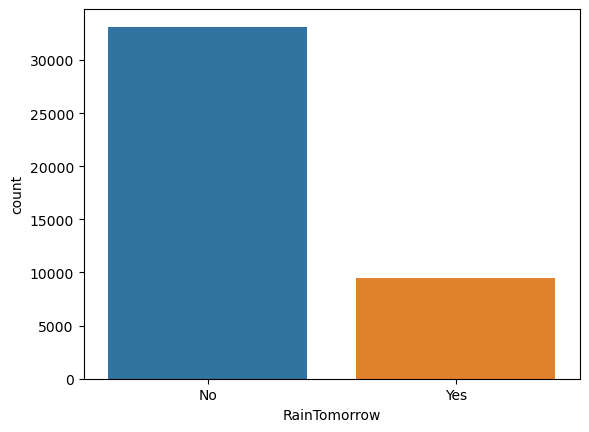

In [ ]:
import seaborn as sns

sns.countplot(x=ResultsFinal['RainTomorrow'])